In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1, l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
from sklearn.decomposition import PCA

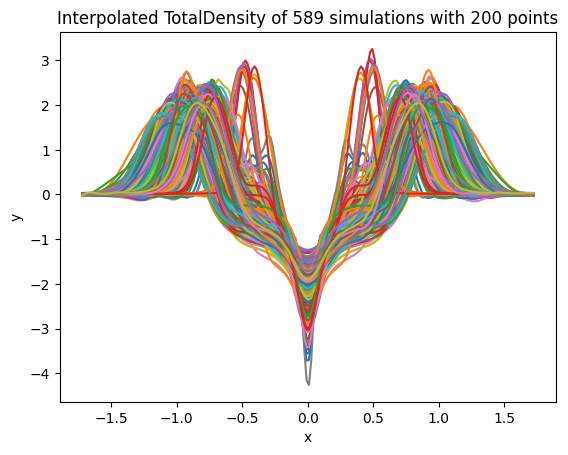

In [7]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

for i in range(0,613):
    TD_y_df[i] = TD_y_df[i]-round((TD_y_df[i][0]+TD_y_df[i][199])/2,3)
    
FF_df = (FF_df-FF_df.mean())/FF_df.std()
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

outlier_column_indexes = set([])

index = 0
for value in TD_y_df.iloc[99]:
    if value > -1:
        outlier_column_indexes.add(index)
    index = index + 1

index = 0 
for value in TD_y_df.iloc[5]:
    if value > 0.30:
        outlier_column_indexes.add(index)
    index = index + 1
    
index = 0 
for value in TD_y_df.iloc[15]:
    if value > 0.30:
        outlier_column_indexes.add(index)
    index = index + 1

FF_df = FF_df.drop(outlier_column_indexes, axis=1)
TD_x_df = TD_x_df.drop(outlier_column_indexes, axis=1)
TD_y_df = TD_y_df.drop(outlier_column_indexes, axis=1)

for i in TD_y_df.columns:
    TD_y_df[i] = TD_y_df[i]-round((TD_y_df[i][0]+TD_y_df[i][199])/2,3)
    
i = 0
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    i = i + 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of ' + str(i) + ' simulations with 200 points')
plt.show()

In [8]:
FF_inc_df = pd.DataFrame(index=range(2000),columns=FF_df.columns)

for column in FF_df.columns:
    values = []
    increment = 0
    for value in FF_df[column]:
        values.append(value)
        values.append(increment)
        increment = increment + 0.001
    
    FF_inc_df[column] = values
    
FF_inc_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
3,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
4,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,...,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000
1996,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932
1997,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,...,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000
1998,-0.636038,-0.761180,-0.771495,-0.743684,-0.668483,-0.761346,-0.747956,-0.655498,-0.668877,-0.778360,...,-0.857847,-0.769097,-0.703954,-0.866470,-0.693590,-0.738105,-0.678494,-0.759994,-0.640617,-0.748596


In [67]:
pca = PCA(n_components=25)
PCA_FF_inc = pca.fit_transform(FF_inc_df.transpose())
PCA_FF_inc_df = pd.DataFrame(PCA_FF_inc.T,columns=FF_df.columns)
#X_decoded = pca.inverse_transform(PCA_FF_inc_df)

In [60]:
names = []
for i in TD_x_df.columns:
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

TD_df = pd.DataFrame(index=range(200),columns=[names])

for i in TD_x_df.columns:
    x_value = []
    y_value = []
    for value in TD_x_df[i]:
        x_value.append(value)
    for value in TD_y_df[i]:
        y_value.append(value)
    
    TD_df[str(i) + 'x'] = x_value
    TD_df[str(i) + 'y'] = y_value
    
TD_df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,608x,608y,609x,609y,610x,610y,611x,611y,612x,612y
0,-1.719098,0.000033,-1.719098,0.010057,-1.719098,0.002887,-1.719098,0.009233,-1.719098,-0.005313,...,-1.719098,0.001498,-1.719098,0.008311,-1.719098,-0.003606,-1.719098,-0.000929,-1.719098,-0.030157
1,-1.701821,0.005281,-1.701821,0.005045,-1.701821,0.002097,-1.701821,0.002070,-1.701821,0.003170,...,-1.701821,0.001285,-1.701821,0.019183,-1.701821,0.001995,-1.701821,0.001921,-1.701821,0.012406
2,-1.684543,0.007669,-1.684543,-0.000403,-1.684543,0.001040,-1.684543,-0.001849,-1.684543,0.006195,...,-1.684543,0.000929,-1.684543,0.016279,-1.684543,0.004938,-1.684543,0.003077,-1.684543,0.036242
3,-1.667266,0.008989,-1.667266,-0.003850,-1.667266,0.000266,-1.667266,-0.003323,-1.667266,0.006168,...,-1.667266,0.000802,-1.667266,0.009266,-1.667266,0.006368,-1.667266,0.003261,-1.667266,0.045904
4,-1.649989,0.009950,-1.649989,-0.004699,-1.649989,-0.000087,-1.649989,-0.003178,-1.649989,0.004777,...,-1.649989,0.000999,-1.649989,0.003950,-1.649989,0.006804,-1.649989,0.003007,-1.649989,0.045806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.649989,0.008359,1.649989,-0.004231,1.649989,0.001067,1.649989,-0.003170,1.649989,0.003185,...,1.649989,0.000340,1.649989,0.021663,1.649989,0.004075,1.649989,0.002616,1.649989,0.029559
196,1.667266,0.007649,1.667266,-0.002702,1.667266,0.002124,1.667266,-0.003536,1.667266,0.004131,...,1.667266,0.000688,1.667266,0.021436,1.667266,-0.002769,1.667266,0.003015,1.667266,0.033099
197,1.684543,0.006775,1.684543,-0.001992,1.684543,0.002720,1.684543,-0.004670,1.684543,0.005269,...,1.684543,0.000980,1.684543,0.017806,1.684543,-0.007580,1.684543,0.003085,1.684543,0.035655
198,1.701821,0.004961,1.701821,-0.003726,1.701821,0.001607,1.701821,-0.006792,1.701821,0.005848,...,1.701821,0.000703,1.701821,0.008904,1.701821,-0.006880,1.701821,0.002310,1.701821,0.035493


In [69]:
input_data = PCA_FF_inc_df.iloc[: ,:-14]
output_data = TD_df.iloc[: , :-28]

In [70]:
column_index = []
for i in input_data.columns:
    column_index.append(i)

random.seed(42)
train = random.sample(column_index,460)
test = []
for number in column_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[125, 28, 296, 264, 240, 153, 114, 581, 99, 454, 38, 35, 105, 235, 250, 539, 30, 214, 451, 237, 481, 299, 6, 174, 589, 367, 576, 170, 232, 362, 592, 104, 409, 109, 386, 371, 285, 51, 492, 138, 407, 90, 317, 390, 207, 79, 53, 245, 313, 91, 584, 113, 565, 571, 486, 393, 177, 399, 382, 226, 288, 81, 186, 595, 93, 248, 205, 149, 528, 495, 344, 562, 300, 123, 369, 540, 453, 413, 417, 31, 128, 442, 18, 434, 172, 216, 148, 39, 119, 489, 504, 306, 470, 563, 512, 508, 352, 269, 213, 474, 490, 346, 246, 535, 146, 552, 137, 401, 302, 290, 145, 402, 316, 231, 577, 315, 215, 196, 523, 77, 274, 266, 550, 406, 27, 462, 63, 87, 338, 547, 426, 572, 228, 322, 588, 208, 206, 463, 251, 561, 139, 298, 5, 465, 389, 65, 368, 289, 404, 147, 519, 345, 185, 64, 161, 234, 556, 244, 1, 452, 388, 542, 270, 410, 101, 273, 61, 337, 163, 526, 431, 328, 111, 469, 202, 433, 92, 291, 286, 0, 323, 176, 533, 9, 443, 479, 168, 133, 33, 134, 505, 47, 50, 394, 262, 41, 287, 71, 72, 355, 256, 596, 94, 559, 457, 327, 464, 501,

In [71]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[number])
    
train_output_values = []
for number in train:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    train_output_values.append(np.concatenate((list_1,list_2)))

test_input_values = []
for number in test:
    test_input_values.append(input_data[number])
    
test_output_values = []
for number in test:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    test_output_values.append(np.concatenate((list_1,list_2)))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(460, 25)
(460, 400, 1)
(115, 25)
(115, 400, 1)


In [73]:
def loss(actual,prediction):
    length = int(len(prediction[0])/2)
    
    index = 0
    distance_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]
         
        distance_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
            
        distance_average_sum = distance_average_sum + distance_sum/length
        index = index + 1
        
    return (distance_average_sum)/len(prediction)

def plots(actual,prediction):
    random.seed(42)
    train = random.sample(range(0,len(test_input_values)),10)
    for number in train:
        length = int(len(prediction[0])/2)
        x_1 = prediction[number][0:length]
        y_1 = prediction[number][length:]
        plt.plot(x_1,y_1,c='b')

        x_2 = test_output_values[number][0:length]
        y_2 = test_output_values[number][length:]
        plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random predictions |blue| against actual |red|')
    plt.show() 
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = test_output_values[index][0:length].tolist()
        t_y = test_output_values[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction |blue| and actual |red| data')
    plt.show()
    
    number = 10
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 75
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 80
    prediction = model.predict(test_input_values)
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show()
    
def training_loss(true, pred):
    row_length = int(tf.shape(true)[1]/2)
    column_length = int(tf.shape(true)[0])
    
    p_x = tf.cast(pred[:, 0:row_length], tf.float32)
    p_y = tf.cast(pred[:, row_length:], tf.float32)
    t_x = tf.cast(true[:, 0:row_length], tf.float32)
    t_y = tf.cast(true[:, row_length:], tf.float32)
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = tf.sqrt(distance_squared)
    distance_sum = tf.reduce_sum(distance, axis=-1)
    distance_average = tf.reduce_mean(distance_sum)

In [72]:
inputs = keras.Input(shape=(25,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=250),
             TensorBoard(log_dir='model_9_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense (Dense)               (None, 2000)              52000     
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_1 (Dropout)         (None, 2000)              0         
                                                                 
 dense_2 (Dense)             (None, 400)               800400    
                                                                 
Total params: 4,854,400
Trainable params: 4,854,400
Non-train

Epoch 71/1500
8/8 [==============================] - 1s 170ms/step - loss: 0.0836 - val_loss: 0.1103
Epoch 72/1500
8/8 [==============================] - 1s 85ms/step - loss: 0.0805 - val_loss: 0.1058
Epoch 73/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.0773 - val_loss: 0.1028
Epoch 74/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0800 - val_loss: 0.1220
Epoch 75/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.0839 - val_loss: 0.1070
Epoch 76/1500
8/8 [==============================] - 1s 85ms/step - loss: 0.0804 - val_loss: 0.1140
Epoch 77/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0797 - val_loss: 0.1140
Epoch 78/1500
8/8 [==============================] - 1s 77ms/step - loss: 0.0821 - val_loss: 0.1063
Epoch 79/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.0823 - val_loss: 0.1089
Epoch 80/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.0762 - val_loss: 0.1007

8/8 [==============================] - 1s 87ms/step - loss: 0.0578 - val_loss: 0.0940
Epoch 153/1500
8/8 [==============================] - 1s 76ms/step - loss: 0.0607 - val_loss: 0.0878
Epoch 154/1500
8/8 [==============================] - 1s 87ms/step - loss: 0.0576 - val_loss: 0.0947
Epoch 155/1500
8/8 [==============================] - 1s 86ms/step - loss: 0.0582 - val_loss: 0.0931
Epoch 156/1500
8/8 [==============================] - 1s 89ms/step - loss: 0.0592 - val_loss: 0.0963
Epoch 157/1500
8/8 [==============================] - 1s 77ms/step - loss: 0.0614 - val_loss: 0.0924
Epoch 158/1500
8/8 [==============================] - 1s 90ms/step - loss: 0.0574 - val_loss: 0.0945
Epoch 159/1500
8/8 [==============================] - 1s 85ms/step - loss: 0.0564 - val_loss: 0.0932
Epoch 160/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.0618 - val_loss: 0.0966
Epoch 161/1500
8/8 [==============================] - 1s 192ms/step - loss: 0.0582 - val_loss: 0.0961
Epoc

8/8 [==============================] - 1s 77ms/step - loss: 0.0540 - val_loss: 0.0921
Epoch 234/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.0498 - val_loss: 0.0907
Epoch 235/1500
8/8 [==============================] - 1s 84ms/step - loss: 0.0509 - val_loss: 0.0898
Epoch 236/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0504 - val_loss: 0.0945
Epoch 237/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.0492 - val_loss: 0.0918
Epoch 238/1500
8/8 [==============================] - 1s 86ms/step - loss: 0.0518 - val_loss: 0.0933
Epoch 239/1500
8/8 [==============================] - 1s 147ms/step - loss: 0.0520 - val_loss: 0.0955
Epoch 240/1500
8/8 [==============================] - 1s 77ms/step - loss: 0.0533 - val_loss: 0.0962
Epoch 241/1500
8/8 [==============================] - 1s 177ms/step - loss: 0.0533 - val_loss: 0.0919
Epoch 242/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0515 - val_loss: 0.0923
Epo

8/8 [==============================] - 1s 77ms/step - loss: 0.0450 - val_loss: 0.0953
Epoch 315/1500
8/8 [==============================] - 2s 245ms/step - loss: 0.0462 - val_loss: 0.0905
Epoch 316/1500
8/8 [==============================] - 4s 515ms/step - loss: 0.0452 - val_loss: 0.0916
Epoch 317/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0447 - val_loss: 0.0913
Epoch 318/1500
8/8 [==============================] - 2s 260ms/step - loss: 0.0440 - val_loss: 0.0948
Epoch 319/1500
8/8 [==============================] - 4s 511ms/step - loss: 0.0458 - val_loss: 0.0920
Epoch 320/1500
8/8 [==============================] - 2s 307ms/step - loss: 0.0446 - val_loss: 0.0893
Epoch 321/1500
8/8 [==============================] - 1s 183ms/step - loss: 0.0439 - val_loss: 0.0897
Epoch 322/1500
8/8 [==============================] - 1s 89ms/step - loss: 0.0455 - val_loss: 0.0908
Epoch 323/1500
8/8 [==============================] - 1s 88ms/step - loss: 0.0452 - val_loss: 0.0926

Epoch 395/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0405 - val_loss: 0.0880
Epoch 396/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0399 - val_loss: 0.0877
Epoch 397/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0392 - val_loss: 0.0867
Epoch 398/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0398 - val_loss: 0.0887
Epoch 399/1500
8/8 [==============================] - 1s 77ms/step - loss: 0.0393 - val_loss: 0.0912
Epoch 400/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0404 - val_loss: 0.0906
Epoch 401/1500
8/8 [==============================] - 1s 172ms/step - loss: 0.0409 - val_loss: 0.0882
Epoch 402/1500
8/8 [==============================] - 1s 89ms/step - loss: 0.0393 - val_loss: 0.0843
Epoch 403/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.0408 - val_loss: 0.0881
Epoch 404/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0398 - val_lo

8/8 [==============================] - 1s 78ms/step - loss: 0.0358 - val_loss: 0.0848
Epoch 476/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0350 - val_loss: 0.0875
Epoch 477/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.0350 - val_loss: 0.0876
Epoch 478/1500
8/8 [==============================] - 1s 171ms/step - loss: 0.0353 - val_loss: 0.0865
Epoch 479/1500
8/8 [==============================] - 1s 84ms/step - loss: 0.0363 - val_loss: 0.0871
Epoch 480/1500
8/8 [==============================] - 1s 84ms/step - loss: 0.0359 - val_loss: 0.0869
Epoch 481/1500
8/8 [==============================] - 1s 181ms/step - loss: 0.0354 - val_loss: 0.0843
Epoch 482/1500
8/8 [==============================] - 1s 87ms/step - loss: 0.0349 - val_loss: 0.0881
Epoch 483/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0347 - val_loss: 0.0874
Epoch 484/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0349 - val_loss: 0.0874
Epo

Epoch 556/1500
8/8 [==============================] - 1s 84ms/step - loss: 0.0346 - val_loss: 0.0861
Epoch 557/1500
8/8 [==============================] - 3s 431ms/step - loss: 0.0362 - val_loss: 0.0868
Epoch 558/1500
8/8 [==============================] - 2s 302ms/step - loss: 0.0338 - val_loss: 0.0850
Epoch 559/1500
8/8 [==============================] - 2s 252ms/step - loss: 0.0337 - val_loss: 0.0891
Epoch 560/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0343 - val_loss: 0.0866
Epoch 561/1500
8/8 [==============================] - 1s 186ms/step - loss: 0.0336 - val_loss: 0.0874
Epoch 562/1500
8/8 [==============================] - 1s 88ms/step - loss: 0.0328 - val_loss: 0.0860
Epoch 563/1500
8/8 [==============================] - 1s 88ms/step - loss: 0.0349 - val_loss: 0.0865
Epoch 564/1500
8/8 [==============================] - 1s 86ms/step - loss: 0.0326 - val_loss: 0.0863
Epoch 565/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0341 - val

Epoch 637/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.0334 - val_loss: 0.0864
Epoch 638/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0331 - val_loss: 0.0857
Epoch 639/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.0329 - val_loss: 0.0852
Epoch 640/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0338 - val_loss: 0.0860
Epoch 641/1500
8/8 [==============================] - 1s 168ms/step - loss: 0.0318 - val_loss: 0.0860
Epoch 642/1500
8/8 [==============================] - 1s 85ms/step - loss: 0.0325 - val_loss: 0.0833
Epoch 643/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.0327 - val_loss: 0.0855
Epoch 644/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.0321 - val_loss: 0.0845
Epoch 645/1500
8/8 [==============================] - 3s 396ms/step - loss: 0.0323 - val_loss: 0.0853
Epoch 646/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.0315 - val_l

Epoch 718/1500
8/8 [==============================] - 1s 76ms/step - loss: 0.0310 - val_loss: 0.0838
Epoch 719/1500
8/8 [==============================] - 1s 85ms/step - loss: 0.0310 - val_loss: 0.0831
Epoch 720/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.0322 - val_loss: 0.0841
Epoch 721/1500
8/8 [==============================] - 1s 181ms/step - loss: 0.0314 - val_loss: 0.0827
Epoch 722/1500
8/8 [==============================] - 1s 86ms/step - loss: 0.0301 - val_loss: 0.0843
Epoch 723/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.0313 - val_loss: 0.0851
Epoch 724/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0318 - val_loss: 0.0869
Epoch 725/1500
8/8 [==============================] - 1s 86ms/step - loss: 0.0320 - val_loss: 0.0849
Epoch 726/1500
8/8 [==============================] - 1s 89ms/step - loss: 0.0312 - val_loss: 0.0846
Epoch 727/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0296 - val_lo

8/8 [==============================] - 1s 82ms/step - loss: 0.0304 - val_loss: 0.0844
Epoch 800/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.0293 - val_loss: 0.0884
Epoch 801/1500
8/8 [==============================] - 1s 179ms/step - loss: 0.0314 - val_loss: 0.0855
Epoch 802/1500
8/8 [==============================] - 1s 86ms/step - loss: 0.0303 - val_loss: 0.0846
Epoch 803/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0286 - val_loss: 0.0859
Epoch 804/1500
8/8 [==============================] - 1s 144ms/step - loss: 0.0295 - val_loss: 0.0838
Epoch 805/1500
8/8 [==============================] - 1s 150ms/step - loss: 0.0300 - val_loss: 0.0859
Epoch 806/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0286 - val_loss: 0.0840
Epoch 807/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0301 - val_loss: 0.0857
Epoch 808/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0297 - val_loss: 0.0851
Ep

8/8 [==============================] - 1s 78ms/step - loss: 0.0276 - val_loss: 0.0834
Epoch 881/1500
8/8 [==============================] - 1s 179ms/step - loss: 0.0283 - val_loss: 0.0832
Epoch 882/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0259 - val_loss: 0.0827
Epoch 883/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.0279 - val_loss: 0.0853
Epoch 884/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.0289 - val_loss: 0.0847
Epoch 885/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.0278 - val_loss: 0.0842
Epoch 886/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0281 - val_loss: 0.0856
Epoch 887/1500
8/8 [==============================] - 1s 77ms/step - loss: 0.0284 - val_loss: 0.0861
Epoch 888/1500
8/8 [==============================] - 1s 85ms/step - loss: 0.0281 - val_loss: 0.0833
Epoch 889/1500
8/8 [==============================] - 1s 86ms/step - loss: 0.0279 - val_loss: 0.0846
Epoc

Epoch 961/1500
8/8 [==============================] - 3s 413ms/step - loss: 0.0269 - val_loss: 0.0839
Epoch 962/1500
8/8 [==============================] - 1s 85ms/step - loss: 0.0266 - val_loss: 0.0850
Epoch 963/1500
8/8 [==============================] - 1s 134ms/step - loss: 0.0269 - val_loss: 0.0828
Epoch 964/1500
8/8 [==============================] - 2s 284ms/step - loss: 0.0269 - val_loss: 0.0843
Epoch 965/1500
8/8 [==============================] - 1s 94ms/step - loss: 0.0269 - val_loss: 0.0842
Epoch 966/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.0263 - val_loss: 0.0829
Epoch 967/1500
8/8 [==============================] - 1s 84ms/step - loss: 0.0273 - val_loss: 0.0846
Epoch 968/1500
8/8 [==============================] - 2s 340ms/step - loss: 0.0272 - val_loss: 0.0853
Epoch 969/1500
8/8 [==============================] - 3s 373ms/step - loss: 0.0263 - val_loss: 0.0834
Epoch 970/1500
8/8 [==============================] - 2s 269ms/step - loss: 0.0268 - v

8/8 [==============================] - 1s 180ms/step - loss: 0.0253 - val_loss: 0.0848
Epoch 1042/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.0266 - val_loss: 0.0828
Epoch 1043/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0251 - val_loss: 0.0799
Epoch 1044/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0249 - val_loss: 0.0815
Epoch 1045/1500
8/8 [==============================] - 1s 77ms/step - loss: 0.0254 - val_loss: 0.0819
Epoch 1046/1500
8/8 [==============================] - 1s 87ms/step - loss: 0.0248 - val_loss: 0.0827
Epoch 1047/1500
8/8 [==============================] - 1s 77ms/step - loss: 0.0237 - val_loss: 0.0832
Epoch 1048/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.0261 - val_loss: 0.0847
Epoch 1049/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0259 - val_loss: 0.0849
Epoch 1050/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.0263 - val_loss: 0.

8/8 [==============================] - 1s 187ms/step - loss: 0.0247 - val_loss: 0.0832
Epoch 1122/1500
8/8 [==============================] - 1s 91ms/step - loss: 0.0251 - val_loss: 0.0846
Epoch 1123/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.0238 - val_loss: 0.0834
Epoch 1124/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0250 - val_loss: 0.0810
Epoch 1125/1500
8/8 [==============================] - 1s 192ms/step - loss: 0.0232 - val_loss: 0.0816
Epoch 1126/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0234 - val_loss: 0.0835
Epoch 1127/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.0232 - val_loss: 0.0828
Epoch 1128/1500
8/8 [==============================] - 1s 86ms/step - loss: 0.0237 - val_loss: 0.0844
Epoch 1129/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.0231 - val_loss: 0.0818
Epoch 1130/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.0243 - val_loss: 0

8/8 [==============================] - 2s 314ms/step - loss: 0.0228 - val_loss: 0.0836
Epoch 1202/1500
8/8 [==============================] - 1s 85ms/step - loss: 0.0221 - val_loss: 0.0823
Epoch 1203/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0226 - val_loss: 0.0846
Epoch 1204/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0228 - val_loss: 0.0821
Epoch 1205/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0237 - val_loss: 0.0815
Epoch 1206/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0235 - val_loss: 0.0814
Epoch 1207/1500
8/8 [==============================] - 1s 85ms/step - loss: 0.0229 - val_loss: 0.0827
Epoch 1208/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0225 - val_loss: 0.0824
Epoch 1209/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0231 - val_loss: 0.0839
Epoch 1210/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0219 - val_loss: 0.

8/8 [==============================] - 1s 182ms/step - loss: 0.0227 - val_loss: 0.0828
Epoch 1282/1500
8/8 [==============================] - 1s 120ms/step - loss: 0.0217 - val_loss: 0.0835
Epoch 1283/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.0225 - val_loss: 0.0831
Epoch 1284/1500
8/8 [==============================] - 1s 80ms/step - loss: 0.0222 - val_loss: 0.0822
Epoch 1285/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0221 - val_loss: 0.0806
Epoch 1286/1500
8/8 [==============================] - 1s 78ms/step - loss: 0.0216 - val_loss: 0.0807
Epoch 1287/1500
8/8 [==============================] - 1s 87ms/step - loss: 0.0223 - val_loss: 0.0811
Epoch 1288/1500
8/8 [==============================] - 1s 77ms/step - loss: 0.0219 - val_loss: 0.0826
Epoch 1289/1500
8/8 [==============================] - 1s 86ms/step - loss: 0.0216 - val_loss: 0.0818
Epoch 1290/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0210 - val_loss: 0

8/8 [==============================] - 1s 196ms/step - loss: 0.0212 - val_loss: 0.0832
Epoch 1362/1500
8/8 [==============================] - 1s 92ms/step - loss: 0.0221 - val_loss: 0.0839
Epoch 1363/1500
8/8 [==============================] - 1s 90ms/step - loss: 0.0210 - val_loss: 0.0824
Epoch 1364/1500
8/8 [==============================] - 1s 95ms/step - loss: 0.0214 - val_loss: 0.0822
Epoch 1365/1500
8/8 [==============================] - 1s 105ms/step - loss: 0.0207 - val_loss: 0.0837
Epoch 1366/1500
8/8 [==============================] - 1s 91ms/step - loss: 0.0206 - val_loss: 0.0812
Epoch 1367/1500
8/8 [==============================] - 1s 107ms/step - loss: 0.0208 - val_loss: 0.0810
Epoch 1368/1500
8/8 [==============================] - 1s 192ms/step - loss: 0.0208 - val_loss: 0.0813
Epoch 1369/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0195 - val_loss: 0.0816
Epoch 1370/1500
8/8 [==============================] - 1s 86ms/step - loss: 0.0198 - val_loss:

8/8 [==============================] - 1s 178ms/step - loss: 0.0194 - val_loss: 0.0829
Epoch 1442/1500
8/8 [==============================] - 1s 88ms/step - loss: 0.0205 - val_loss: 0.0828
Epoch 1443/1500
8/8 [==============================] - 1s 82ms/step - loss: 0.0204 - val_loss: 0.0835
Epoch 1444/1500
8/8 [==============================] - 1s 89ms/step - loss: 0.0204 - val_loss: 0.0814
Epoch 1445/1500
8/8 [==============================] - 1s 88ms/step - loss: 0.0202 - val_loss: 0.0820
Epoch 1446/1500
8/8 [==============================] - 1s 83ms/step - loss: 0.0193 - val_loss: 0.0827
Epoch 1447/1500
8/8 [==============================] - 1s 81ms/step - loss: 0.0192 - val_loss: 0.0838
Epoch 1448/1500
8/8 [==============================] - 1s 95ms/step - loss: 0.0194 - val_loss: 0.0833
Epoch 1449/1500
8/8 [==============================] - 1s 79ms/step - loss: 0.0192 - val_loss: 0.0815
Epoch 1450/1500
8/8 [==============================] - 1s 91ms/step - loss: 0.0204 - val_loss: 0.

NameError: name 'loss' is not defined


4/4 [==============================] - 0s 8ms/step
Loss is:0.13347426572703128

4/4 [==============================] - 0s 8ms/step


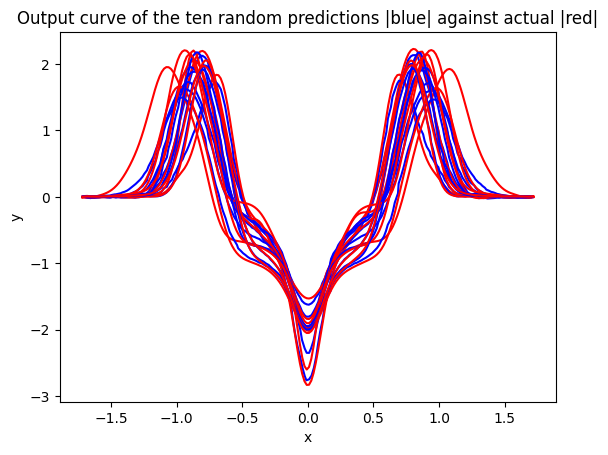

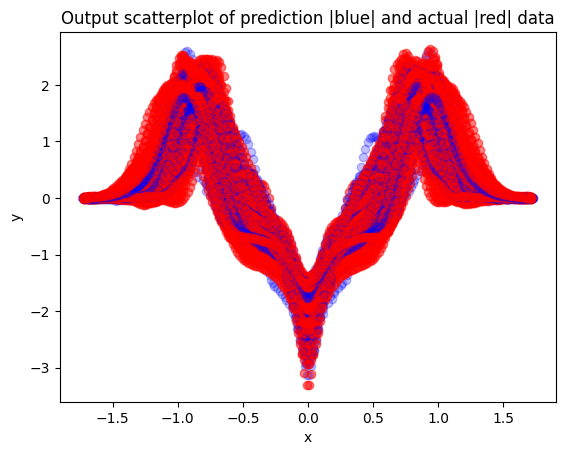

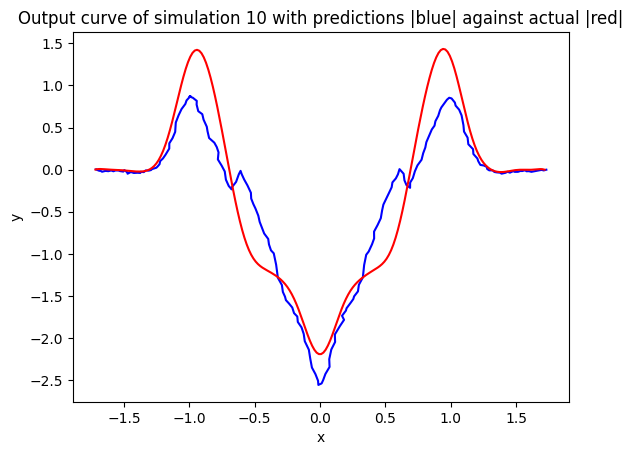

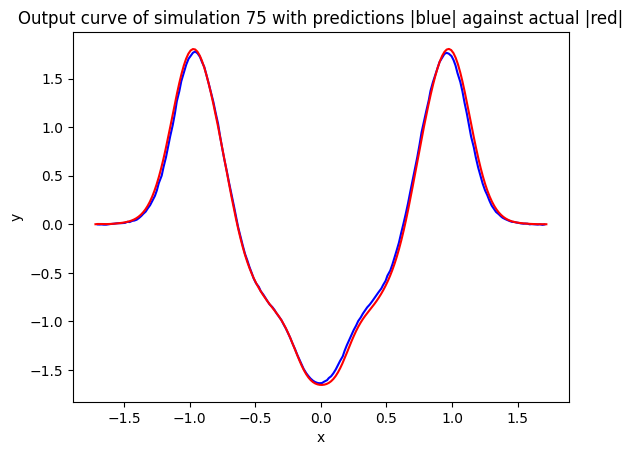

4/4 [==============================] - 0s 6ms/step


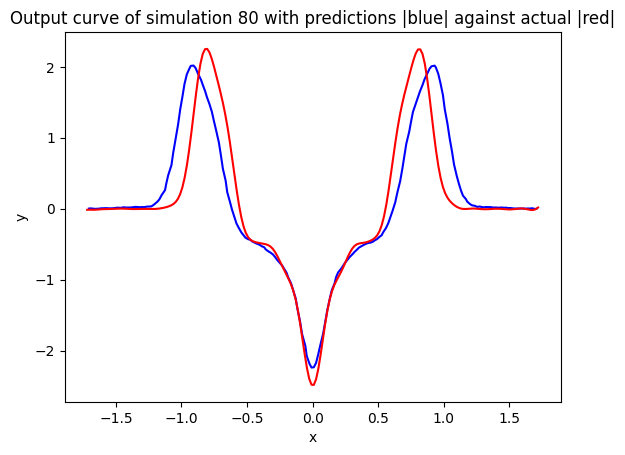

In [74]:
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_3 (Dense)             (None, 2000)              52000     
                                                                 
 dropout_2 (Dropout)         (None, 2000)              0         
                                                                 
 dense_4 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_3 (Dropout)         (None, 2000)              0         
                                                                 
 dense_5 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_4 (Dropout)         (None, 2000)              0   

Epoch 65/1500
8/8 [==============================] - 1s 188ms/step - loss: 0.0650 - val_loss: 0.0921
Epoch 66/1500
8/8 [==============================] - 2s 195ms/step - loss: 0.0648 - val_loss: 0.0957
Epoch 67/1500
8/8 [==============================] - 2s 206ms/step - loss: 0.0636 - val_loss: 0.0892
Epoch 68/1500
8/8 [==============================] - 2s 202ms/step - loss: 0.0684 - val_loss: 0.0968
Epoch 69/1500
8/8 [==============================] - 2s 202ms/step - loss: 0.0707 - val_loss: 0.0968
Epoch 70/1500
8/8 [==============================] - 2s 206ms/step - loss: 0.0680 - val_loss: 0.0860
Epoch 71/1500
8/8 [==============================] - 4s 506ms/step - loss: 0.0665 - val_loss: 0.0932
Epoch 72/1500
8/8 [==============================] - 1s 183ms/step - loss: 0.0643 - val_loss: 0.0888
Epoch 73/1500
8/8 [==============================] - 1s 189ms/step - loss: 0.0648 - val_loss: 0.0919
Epoch 74/1500
8/8 [==============================] - 2s 195ms/step - loss: 0.0649 - val_los

8/8 [==============================] - 1s 183ms/step - loss: 0.0460 - val_loss: 0.0839
Epoch 146/1500
8/8 [==============================] - 1s 183ms/step - loss: 0.0474 - val_loss: 0.0833
Epoch 147/1500
8/8 [==============================] - 2s 198ms/step - loss: 0.0473 - val_loss: 0.0800
Epoch 148/1500
8/8 [==============================] - 2s 201ms/step - loss: 0.0457 - val_loss: 0.0862
Epoch 149/1500
8/8 [==============================] - 2s 193ms/step - loss: 0.0449 - val_loss: 0.0846
Epoch 150/1500
8/8 [==============================] - 1s 191ms/step - loss: 0.0440 - val_loss: 0.0855
Epoch 151/1500
8/8 [==============================] - 4s 480ms/step - loss: 0.0432 - val_loss: 0.0836
Epoch 152/1500
8/8 [==============================] - 2s 253ms/step - loss: 0.0433 - val_loss: 0.0829
Epoch 153/1500
8/8 [==============================] - 2s 241ms/step - loss: 0.0448 - val_loss: 0.0851
Epoch 154/1500
8/8 [==============================] - 2s 231ms/step - loss: 0.0462 - val_loss: 0.

8/8 [==============================] - 1s 189ms/step - loss: 0.0387 - val_loss: 0.0849
Epoch 226/1500
8/8 [==============================] - 1s 189ms/step - loss: 0.0411 - val_loss: 0.0861
Epoch 227/1500
8/8 [==============================] - 2s 195ms/step - loss: 0.0383 - val_loss: 0.0851
Epoch 228/1500
8/8 [==============================] - 1s 182ms/step - loss: 0.0368 - val_loss: 0.0869
Epoch 229/1500
8/8 [==============================] - 2s 198ms/step - loss: 0.0395 - val_loss: 0.0880
Epoch 230/1500
8/8 [==============================] - 1s 186ms/step - loss: 0.0380 - val_loss: 0.0872
Epoch 231/1500
8/8 [==============================] - 4s 484ms/step - loss: 0.0394 - val_loss: 0.0891
Epoch 232/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0395 - val_loss: 0.0850
Epoch 233/1500
8/8 [==============================] - 2s 194ms/step - loss: 0.0382 - val_loss: 0.0873
Epoch 234/1500
8/8 [==============================] - 1s 191ms/step - loss: 0.0375 - val_loss: 0.

8/8 [==============================] - 2s 236ms/step - loss: 0.0371 - val_loss: 0.0889
Epoch 306/1500
8/8 [==============================] - 2s 189ms/step - loss: 0.0349 - val_loss: 0.0897
Epoch 307/1500
8/8 [==============================] - 2s 212ms/step - loss: 0.0360 - val_loss: 0.0851
Epoch 308/1500
8/8 [==============================] - 1s 183ms/step - loss: 0.0347 - val_loss: 0.0883
Epoch 309/1500
8/8 [==============================] - 1s 182ms/step - loss: 0.0349 - val_loss: 0.0882
Epoch 310/1500
8/8 [==============================] - 2s 204ms/step - loss: 0.0352 - val_loss: 0.0871
Epoch 311/1500
8/8 [==============================] - 3s 444ms/step - loss: 0.0367 - val_loss: 0.0838
Epoch 312/1500
8/8 [==============================] - 2s 208ms/step - loss: 0.0342 - val_loss: 0.0871
Epoch 313/1500
8/8 [==============================] - 2s 225ms/step - loss: 0.0356 - val_loss: 0.0875
Epoch 314/1500
8/8 [==============================] - 1s 183ms/step - loss: 0.0363 - val_loss: 0.

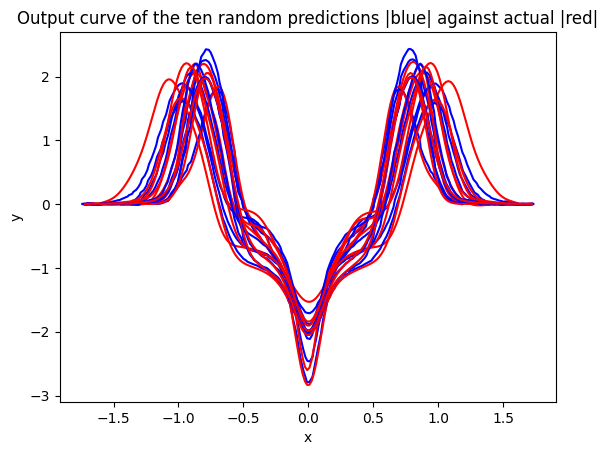

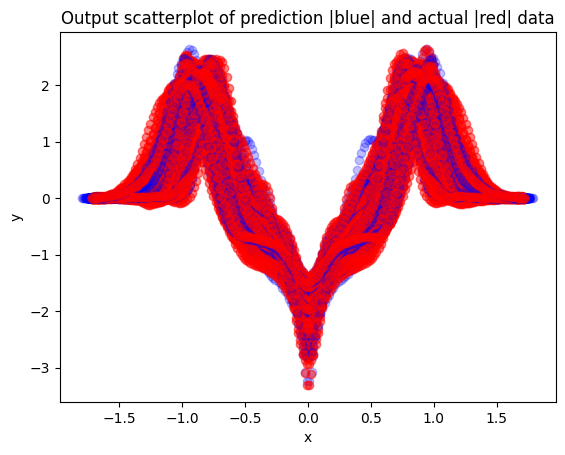

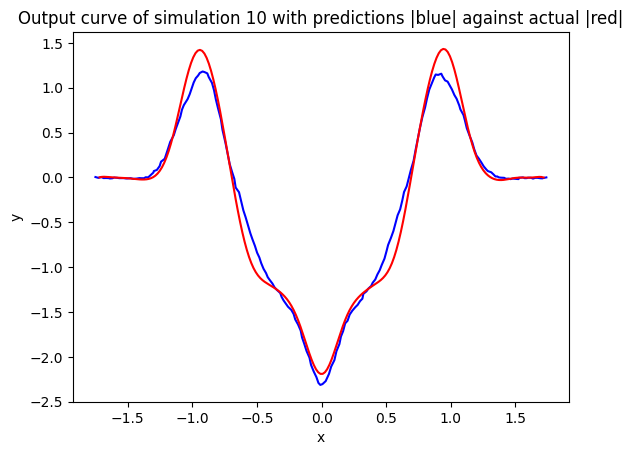

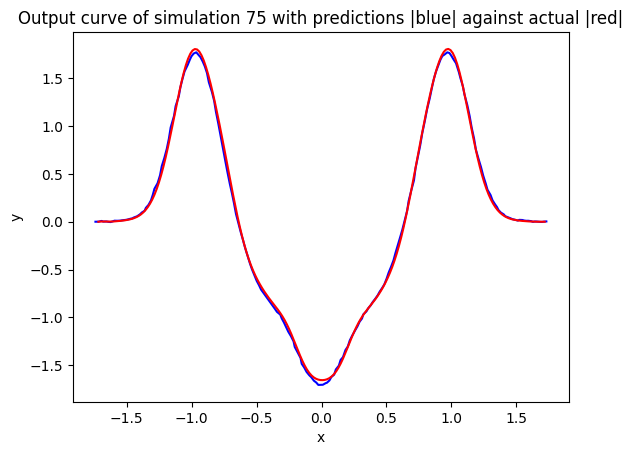

4/4 [==============================] - 0s 12ms/step


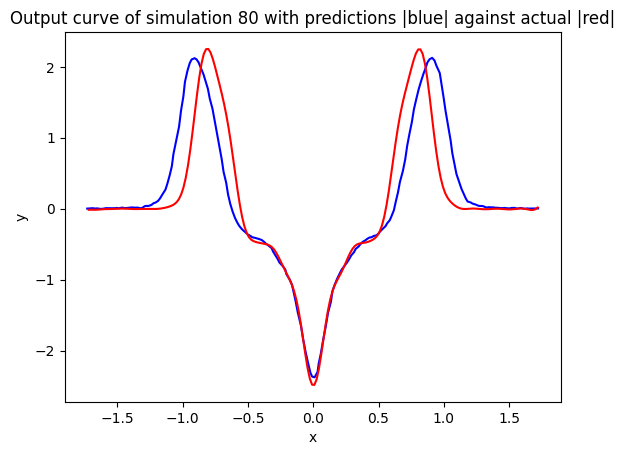

In [75]:
inputs = keras.Input(shape=(25,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_9_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_8 (Dense)             (None, 2000)              52000     
                                                                 
 dropout_6 (Dropout)         (None, 2000)              0         
                                                                 
 dense_9 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_7 (Dropout)         (None, 2000)              0         
                                                                 
 dense_10 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_8 (Dropout)         (None, 2000)              0   

8/8 [==============================] - 3s 321ms/step - loss: 0.0994 - val_loss: 0.1034
Epoch 60/1500
8/8 [==============================] - 3s 366ms/step - loss: 0.0988 - val_loss: 0.1077
Epoch 61/1500
8/8 [==============================] - 6s 824ms/step - loss: 0.0996 - val_loss: 0.1092
Epoch 62/1500
8/8 [==============================] - 3s 334ms/step - loss: 0.0986 - val_loss: 0.1106
Epoch 63/1500
8/8 [==============================] - 3s 327ms/step - loss: 0.0975 - val_loss: 0.1123
Epoch 64/1500
8/8 [==============================] - 3s 356ms/step - loss: 0.0945 - val_loss: 0.1015
Epoch 65/1500
8/8 [==============================] - 3s 354ms/step - loss: 0.0945 - val_loss: 0.1015
Epoch 66/1500
8/8 [==============================] - 2s 312ms/step - loss: 0.0936 - val_loss: 0.1052
Epoch 67/1500
8/8 [==============================] - 2s 316ms/step - loss: 0.0936 - val_loss: 0.0971
Epoch 68/1500
8/8 [==============================] - 3s 330ms/step - loss: 0.0891 - val_loss: 0.0969
Epoc

Epoch 140/1500
8/8 [==============================] - 2s 310ms/step - loss: 0.0578 - val_loss: 0.0872
Epoch 141/1500
8/8 [==============================] - 6s 751ms/step - loss: 0.0597 - val_loss: 0.0872
Epoch 142/1500
8/8 [==============================] - 3s 371ms/step - loss: 0.0584 - val_loss: 0.0880
Epoch 143/1500
8/8 [==============================] - 2s 303ms/step - loss: 0.0603 - val_loss: 0.0847
Epoch 144/1500
8/8 [==============================] - 2s 303ms/step - loss: 0.0580 - val_loss: 0.0939
Epoch 145/1500
8/8 [==============================] - 2s 316ms/step - loss: 0.0583 - val_loss: 0.0906
Epoch 146/1500
8/8 [==============================] - 2s 303ms/step - loss: 0.0595 - val_loss: 0.0887
Epoch 147/1500
8/8 [==============================] - 2s 295ms/step - loss: 0.0596 - val_loss: 0.0864
Epoch 148/1500
8/8 [==============================] - 2s 311ms/step - loss: 0.0560 - val_loss: 0.0850
Epoch 149/1500
8/8 [==============================] - 2s 302ms/step - loss: 0.0543

8/8 [==============================] - 2s 302ms/step - loss: 0.0459 - val_loss: 0.0872
Epoch 221/1500
8/8 [==============================] - 5s 747ms/step - loss: 0.0460 - val_loss: 0.0906
Epoch 222/1500
8/8 [==============================] - 3s 361ms/step - loss: 0.0474 - val_loss: 0.0876
Epoch 223/1500
8/8 [==============================] - 2s 290ms/step - loss: 0.0500 - val_loss: 0.0874
Epoch 224/1500
8/8 [==============================] - 2s 293ms/step - loss: 0.0468 - val_loss: 0.0869
Epoch 225/1500
8/8 [==============================] - 2s 288ms/step - loss: 0.0490 - val_loss: 0.0902
Epoch 226/1500
8/8 [==============================] - 2s 290ms/step - loss: 0.0479 - val_loss: 0.0872
Epoch 227/1500
8/8 [==============================] - 2s 289ms/step - loss: 0.0474 - val_loss: 0.0885
Epoch 228/1500
8/8 [==============================] - 2s 291ms/step - loss: 0.0470 - val_loss: 0.0871
Epoch 229/1500
8/8 [==============================] - 2s 310ms/step - loss: 0.0465 - val_loss: 0.

8/8 [==============================] - 2s 316ms/step - loss: 0.0418 - val_loss: 0.0883
Epoch 301/1500
8/8 [==============================] - 6s 771ms/step - loss: 0.0446 - val_loss: 0.0868
Epoch 302/1500
8/8 [==============================] - 2s 303ms/step - loss: 0.0425 - val_loss: 0.0872
Epoch 303/1500
8/8 [==============================] - 2s 307ms/step - loss: 0.0411 - val_loss: 0.0874
Epoch 304/1500
8/8 [==============================] - 3s 331ms/step - loss: 0.0427 - val_loss: 0.0852
Epoch 305/1500
8/8 [==============================] - 2s 321ms/step - loss: 0.0421 - val_loss: 0.0854
Epoch 306/1500
8/8 [==============================] - 2s 302ms/step - loss: 0.0423 - val_loss: 0.0860
Epoch 307/1500
8/8 [==============================] - 3s 347ms/step - loss: 0.0406 - val_loss: 0.0891
Epoch 308/1500
8/8 [==============================] - 3s 331ms/step - loss: 0.0415 - val_loss: 0.0931
Epoch 309/1500
8/8 [==============================] - 2s 298ms/step - loss: 0.0420 - val_loss: 0.

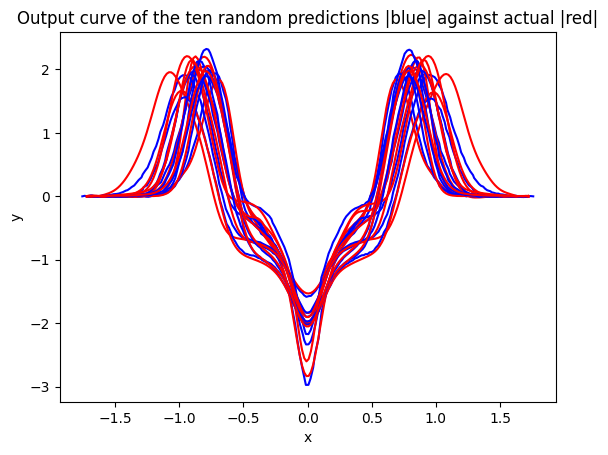

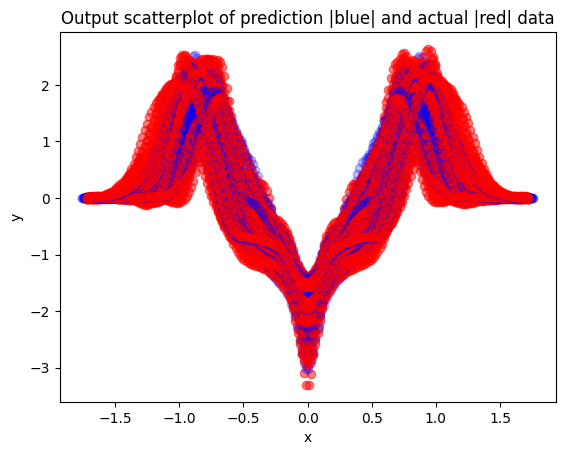

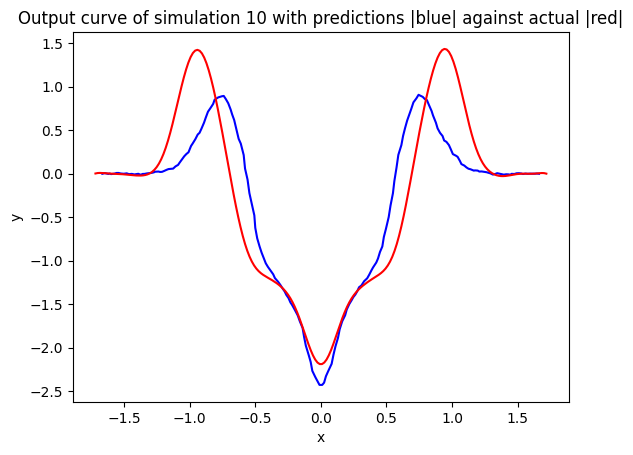

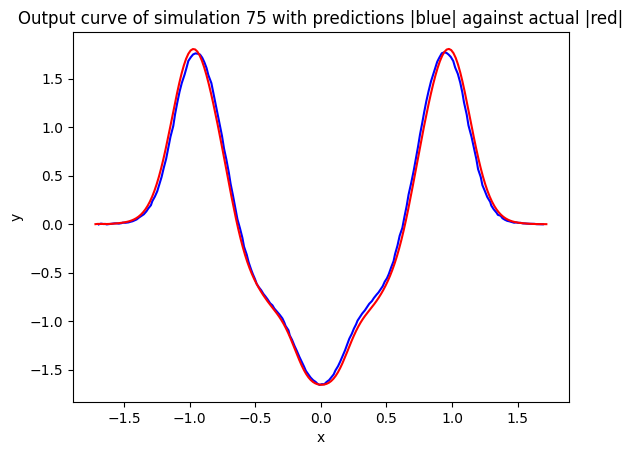

4/4 [==============================] - 0s 24ms/step


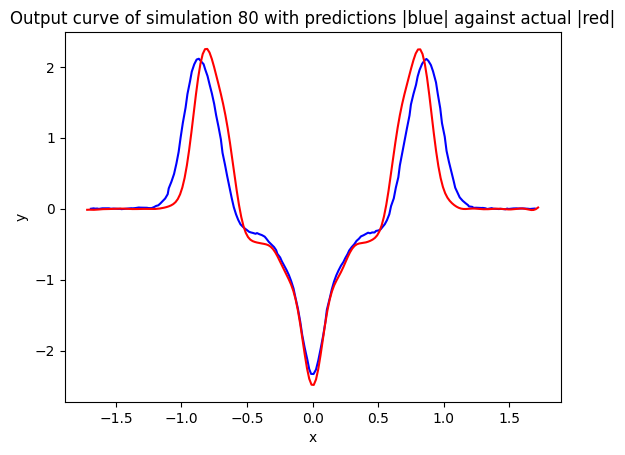

In [76]:
inputs = keras.Input(shape=(25,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=200),
             TensorBoard(log_dir='model_9_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_15 (Dense)            (None, 2000)              52000     
                                                                 
 dropout_12 (Dropout)        (None, 2000)              0         
                                                                 
 dense_16 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_13 (Dropout)        (None, 2000)              0         
                                                                 
 dense_17 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_14 (Dropout)        (None, 2000)              0   

8/8 [==============================] - 3s 319ms/step - loss: 0.0813 - val_loss: 0.1041
Epoch 60/1500
8/8 [==============================] - 3s 335ms/step - loss: 0.0780 - val_loss: 0.0962
Epoch 61/1500
8/8 [==============================] - 6s 831ms/step - loss: 0.0789 - val_loss: 0.0983
Epoch 62/1500
8/8 [==============================] - 3s 351ms/step - loss: 0.0788 - val_loss: 0.1058
Epoch 63/1500
8/8 [==============================] - 3s 328ms/step - loss: 0.0757 - val_loss: 0.1025
Epoch 64/1500
8/8 [==============================] - 3s 335ms/step - loss: 0.0738 - val_loss: 0.0963
Epoch 65/1500
8/8 [==============================] - 3s 376ms/step - loss: 0.0793 - val_loss: 0.1051
Epoch 66/1500
8/8 [==============================] - 2s 289ms/step - loss: 0.0779 - val_loss: 0.1007
Epoch 67/1500
8/8 [==============================] - 3s 359ms/step - loss: 0.0761 - val_loss: 0.0950
Epoch 68/1500
8/8 [==============================] - 2s 319ms/step - loss: 0.0752 - val_loss: 0.1013
Epoc

Epoch 140/1500
8/8 [==============================] - 2s 310ms/step - loss: 0.0432 - val_loss: 0.0928
Epoch 141/1500
8/8 [==============================] - 7s 891ms/step - loss: 0.0448 - val_loss: 0.0992
Epoch 142/1500
8/8 [==============================] - 3s 335ms/step - loss: 0.0461 - val_loss: 0.0932
Epoch 143/1500
8/8 [==============================] - 3s 349ms/step - loss: 0.0433 - val_loss: 0.0889
Epoch 144/1500
8/8 [==============================] - 3s 355ms/step - loss: 0.0418 - val_loss: 0.0866
Epoch 145/1500
8/8 [==============================] - 3s 320ms/step - loss: 0.0414 - val_loss: 0.0897
Epoch 146/1500
8/8 [==============================] - 2s 291ms/step - loss: 0.0410 - val_loss: 0.0837
Epoch 147/1500
8/8 [==============================] - 2s 290ms/step - loss: 0.0419 - val_loss: 0.0876
Epoch 148/1500
8/8 [==============================] - 2s 285ms/step - loss: 0.0420 - val_loss: 0.0944
Epoch 149/1500
8/8 [==============================] - 2s 285ms/step - loss: 0.0439

8/8 [==============================] - 2s 315ms/step - loss: 0.0356 - val_loss: 0.0927
Epoch 221/1500
8/8 [==============================] - 6s 772ms/step - loss: 0.0347 - val_loss: 0.0829
Epoch 222/1500
8/8 [==============================] - 2s 315ms/step - loss: 0.0373 - val_loss: 0.0909
Epoch 223/1500
8/8 [==============================] - 2s 302ms/step - loss: 0.0368 - val_loss: 0.0917
Epoch 224/1500
8/8 [==============================] - 2s 298ms/step - loss: 0.0354 - val_loss: 0.0900
Epoch 225/1500
8/8 [==============================] - 2s 295ms/step - loss: 0.0341 - val_loss: 0.0900
Epoch 226/1500
8/8 [==============================] - 2s 301ms/step - loss: 0.0330 - val_loss: 0.0853
Epoch 227/1500
8/8 [==============================] - 2s 293ms/step - loss: 0.0328 - val_loss: 0.0863
Epoch 228/1500
8/8 [==============================] - 3s 335ms/step - loss: 0.0315 - val_loss: 0.0855
Epoch 229/1500
8/8 [==============================] - 3s 335ms/step - loss: 0.0329 - val_loss: 0.

8/8 [==============================] - 3s 366ms/step - loss: 0.0301 - val_loss: 0.0814
Epoch 301/1500
8/8 [==============================] - 5s 729ms/step - loss: 0.0295 - val_loss: 0.0857
Epoch 302/1500
8/8 [==============================] - 2s 290ms/step - loss: 0.0297 - val_loss: 0.0843
Epoch 303/1500
8/8 [==============================] - 3s 334ms/step - loss: 0.0300 - val_loss: 0.0853
Epoch 304/1500
8/8 [==============================] - 2s 310ms/step - loss: 0.0316 - val_loss: 0.0868
Epoch 305/1500
8/8 [==============================] - 3s 346ms/step - loss: 0.0315 - val_loss: 0.0902
Epoch 306/1500
8/8 [==============================] - 2s 316ms/step - loss: 0.0319 - val_loss: 0.0869
Epoch 307/1500
8/8 [==============================] - 2s 311ms/step - loss: 0.0314 - val_loss: 0.0835
Epoch 308/1500
8/8 [==============================] - 3s 328ms/step - loss: 0.0312 - val_loss: 0.0823
Epoch 309/1500
8/8 [==============================] - 2s 314ms/step - loss: 0.0329 - val_loss: 0.

8/8 [==============================] - 2s 299ms/step - loss: 0.0292 - val_loss: 0.0834
Epoch 381/1500
8/8 [==============================] - 6s 881ms/step - loss: 0.0288 - val_loss: 0.0826
Epoch 382/1500
8/8 [==============================] - 3s 332ms/step - loss: 0.0276 - val_loss: 0.0853
Epoch 383/1500
8/8 [==============================] - 2s 311ms/step - loss: 0.0282 - val_loss: 0.0824
Epoch 384/1500
8/8 [==============================] - 2s 304ms/step - loss: 0.0280 - val_loss: 0.0815
Epoch 385/1500
8/8 [==============================] - 2s 311ms/step - loss: 0.0289 - val_loss: 0.0859
Epoch 386/1500
8/8 [==============================] - 2s 285ms/step - loss: 0.0293 - val_loss: 0.0848
Epoch 387/1500
8/8 [==============================] - 2s 285ms/step - loss: 0.0291 - val_loss: 0.0870
Epoch 388/1500
8/8 [==============================] - 2s 304ms/step - loss: 0.0291 - val_loss: 0.0859
Epoch 389/1500
8/8 [==============================] - 3s 322ms/step - loss: 0.0287 - val_loss: 0.

8/8 [==============================] - 3s 325ms/step - loss: 0.0269 - val_loss: 0.0817
Epoch 461/1500
8/8 [==============================] - 6s 822ms/step - loss: 0.0266 - val_loss: 0.0875
Epoch 462/1500
8/8 [==============================] - 2s 295ms/step - loss: 0.0263 - val_loss: 0.0875
Epoch 463/1500
8/8 [==============================] - 3s 322ms/step - loss: 0.0264 - val_loss: 0.0873
Epoch 464/1500
8/8 [==============================] - 3s 332ms/step - loss: 0.0259 - val_loss: 0.0857
Epoch 465/1500
8/8 [==============================] - 2s 321ms/step - loss: 0.0270 - val_loss: 0.0864
Epoch 466/1500
8/8 [==============================] - 3s 339ms/step - loss: 0.0263 - val_loss: 0.0842
Epoch 467/1500
8/8 [==============================] - 2s 306ms/step - loss: 0.0272 - val_loss: 0.0829
Epoch 468/1500
8/8 [==============================] - 2s 312ms/step - loss: 0.0266 - val_loss: 0.0845
Epoch 469/1500
8/8 [==============================] - 3s 348ms/step - loss: 0.0285 - val_loss: 0.

8/8 [==============================] - 3s 368ms/step - loss: 0.0282 - val_loss: 0.0850
Epoch 541/1500
8/8 [==============================] - 7s 946ms/step - loss: 0.0274 - val_loss: 0.0878
Epoch 542/1500
8/8 [==============================] - 3s 361ms/step - loss: 0.0268 - val_loss: 0.0873
Epoch 543/1500
8/8 [==============================] - 3s 324ms/step - loss: 0.0262 - val_loss: 0.0891
Epoch 544/1500
8/8 [==============================] - 3s 433ms/step - loss: 0.0254 - val_loss: 0.0846
Epoch 545/1500
8/8 [==============================] - 3s 427ms/step - loss: 0.0253 - val_loss: 0.0852
Epoch 546/1500
8/8 [==============================] - 3s 349ms/step - loss: 0.0256 - val_loss: 0.0844
Epoch 547/1500
8/8 [==============================] - 3s 344ms/step - loss: 0.0261 - val_loss: 0.0884
Epoch 548/1500
8/8 [==============================] - 2s 309ms/step - loss: 0.0251 - val_loss: 0.0867
Epoch 549/1500
8/8 [==============================] - 2s 304ms/step - loss: 0.0248 - val_loss: 0.

8/8 [==============================] - 3s 452ms/step - loss: 0.0252 - val_loss: 0.0972
Epoch 621/1500
8/8 [==============================] - 7s 894ms/step - loss: 0.0250 - val_loss: 0.0908
Epoch 622/1500
8/8 [==============================] - 3s 375ms/step - loss: 0.0258 - val_loss: 0.0875
Epoch 623/1500
8/8 [==============================] - 3s 333ms/step - loss: 0.0243 - val_loss: 0.0942
Epoch 624/1500
8/8 [==============================] - 3s 416ms/step - loss: 0.0254 - val_loss: 0.0948
Epoch 625/1500
8/8 [==============================] - 3s 359ms/step - loss: 0.0260 - val_loss: 0.0965
Epoch 626/1500
8/8 [==============================] - 3s 326ms/step - loss: 0.0282 - val_loss: 0.0960
Epoch 627/1500
8/8 [==============================] - 3s 433ms/step - loss: 0.0265 - val_loss: 0.0951
Epoch 628/1500
8/8 [==============================] - 3s 365ms/step - loss: 0.0274 - val_loss: 0.0936
Epoch 629/1500
8/8 [==============================] - 3s 402ms/step - loss: 0.0260 - val_loss: 0.

8/8 [==============================] - 2s 311ms/step - loss: 0.0236 - val_loss: 0.0877
Epoch 701/1500
8/8 [==============================] - 7s 916ms/step - loss: 0.0261 - val_loss: 0.0884
Epoch 702/1500
8/8 [==============================] - 3s 393ms/step - loss: 0.0253 - val_loss: 0.0888
Epoch 703/1500
8/8 [==============================] - 3s 425ms/step - loss: 0.0249 - val_loss: 0.0883
Epoch 704/1500
8/8 [==============================] - 3s 351ms/step - loss: 0.0244 - val_loss: 0.0874
Epoch 705/1500
8/8 [==============================] - 3s 325ms/step - loss: 0.0227 - val_loss: 0.0882
Epoch 706/1500
8/8 [==============================] - 3s 354ms/step - loss: 0.0234 - val_loss: 0.0908
Epoch 707/1500
8/8 [==============================] - 2s 294ms/step - loss: 0.0237 - val_loss: 0.0978
Epoch 708/1500
8/8 [==============================] - 3s 431ms/step - loss: 0.0236 - val_loss: 0.0948
Epoch 709/1500
8/8 [==============================] - 3s 373ms/step - loss: 0.0241 - val_loss: 0.

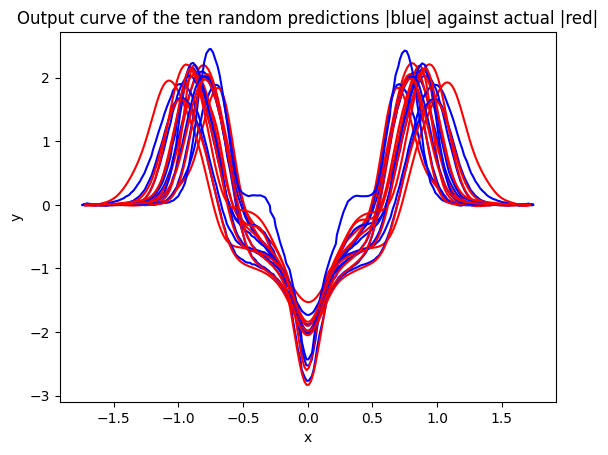

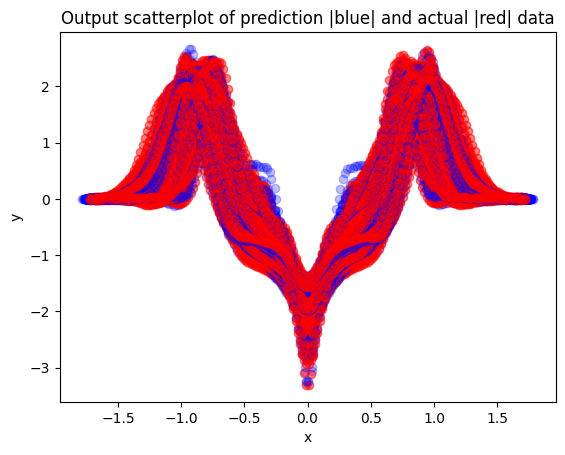

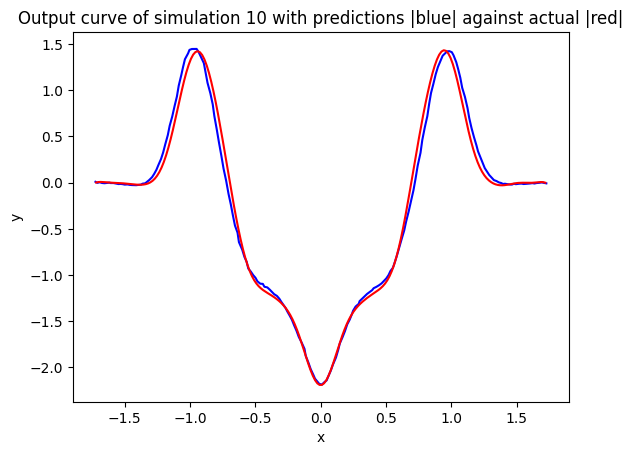

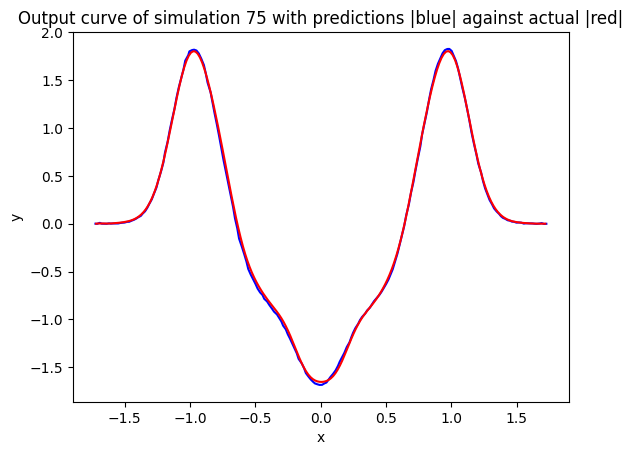

4/4 [==============================] - 0s 21ms/step


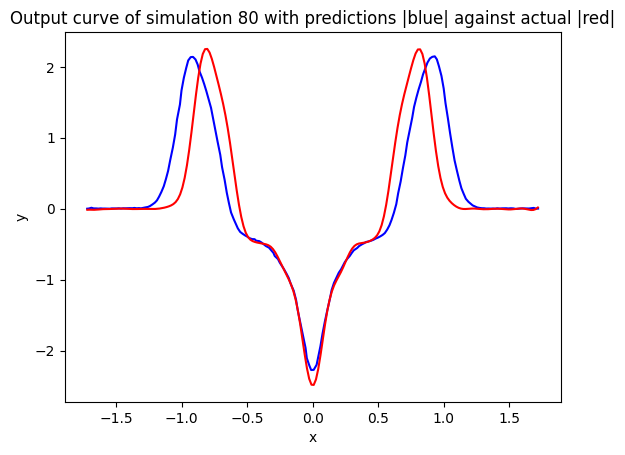

In [77]:
inputs = keras.Input(shape=(25,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=200),
             TensorBoard(log_dir='model_9_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

In [78]:
inputs = keras.Input(shape=(25,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.15, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.15, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.15, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.15, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.15, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.15, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.15, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=250),
             TensorBoard(log_dir='model_9_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_22 (Dense)            (None, 2000)              52000     
                                                                 
 dropout_18 (Dropout)        (None, 2000)              0         
                                                                 
 dense_23 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_19 (Dropout)        (None, 2000)              0         
                                                                 
 dense_24 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_20 (Dropout)        (None, 2000)              0   

8/8 [==============================] - 3s 356ms/step - loss: 0.1077 - val_loss: 0.1203
Epoch 58/1500
8/8 [==============================] - 3s 379ms/step - loss: 0.1083 - val_loss: 0.1232
Epoch 59/1500
8/8 [==============================] - 4s 483ms/step - loss: 0.1063 - val_loss: 0.1149
Epoch 60/1500
8/8 [==============================] - 3s 394ms/step - loss: 0.1066 - val_loss: 0.1157
Epoch 61/1500
8/8 [==============================] - 7s 903ms/step - loss: 0.1042 - val_loss: 0.1166
Epoch 62/1500
8/8 [==============================] - 3s 350ms/step - loss: 0.1037 - val_loss: 0.1110
Epoch 63/1500
8/8 [==============================] - 3s 364ms/step - loss: 0.1018 - val_loss: 0.1137
Epoch 64/1500
8/8 [==============================] - 3s 354ms/step - loss: 0.1027 - val_loss: 0.1137
Epoch 65/1500
8/8 [==============================] - 3s 349ms/step - loss: 0.1029 - val_loss: 0.1065
Epoch 66/1500
8/8 [==============================] - 3s 355ms/step - loss: 0.1023 - val_loss: 0.1110
Epoc

Epoch 138/1500
8/8 [==============================] - 3s 353ms/step - loss: 0.0645 - val_loss: 0.0950
Epoch 139/1500
8/8 [==============================] - 3s 356ms/step - loss: 0.0613 - val_loss: 0.0943
Epoch 140/1500
8/8 [==============================] - 3s 355ms/step - loss: 0.0599 - val_loss: 0.0979
Epoch 141/1500
8/8 [==============================] - 7s 894ms/step - loss: 0.0606 - val_loss: 0.0921
Epoch 142/1500
8/8 [==============================] - 3s 357ms/step - loss: 0.0577 - val_loss: 0.0873
Epoch 143/1500
8/8 [==============================] - 3s 387ms/step - loss: 0.0611 - val_loss: 0.0923
Epoch 144/1500
8/8 [==============================] - 3s 355ms/step - loss: 0.0585 - val_loss: 0.0906
Epoch 145/1500
8/8 [==============================] - 3s 349ms/step - loss: 0.0591 - val_loss: 0.1010
Epoch 146/1500
8/8 [==============================] - 3s 357ms/step - loss: 0.0605 - val_loss: 0.0936
Epoch 147/1500
8/8 [==============================] - 3s 358ms/step - loss: 0.0573

8/8 [==============================] - 3s 398ms/step - loss: 0.0454 - val_loss: 0.0891
Epoch 219/1500
8/8 [==============================] - 3s 379ms/step - loss: 0.0480 - val_loss: 0.0842
Epoch 220/1500
8/8 [==============================] - 3s 393ms/step - loss: 0.0467 - val_loss: 0.0850
Epoch 221/1500
8/8 [==============================] - 7s 935ms/step - loss: 0.0479 - val_loss: 0.0981
Epoch 222/1500
8/8 [==============================] - 3s 352ms/step - loss: 0.0495 - val_loss: 0.0858
Epoch 223/1500
8/8 [==============================] - 3s 378ms/step - loss: 0.0500 - val_loss: 0.0940
Epoch 224/1500
8/8 [==============================] - 3s 361ms/step - loss: 0.0451 - val_loss: 0.0862
Epoch 225/1500
8/8 [==============================] - 3s 392ms/step - loss: 0.0460 - val_loss: 0.0926
Epoch 226/1500
8/8 [==============================] - 3s 406ms/step - loss: 0.0464 - val_loss: 0.0844
Epoch 227/1500
8/8 [==============================] - 3s 354ms/step - loss: 0.0436 - val_loss: 0.

8/8 [==============================] - 3s 356ms/step - loss: 0.0423 - val_loss: 0.0872
Epoch 299/1500
8/8 [==============================] - 3s 343ms/step - loss: 0.0423 - val_loss: 0.0872
Epoch 300/1500
8/8 [==============================] - 3s 401ms/step - loss: 0.0412 - val_loss: 0.0893
Epoch 301/1500
8/8 [==============================] - 7s 917ms/step - loss: 0.0414 - val_loss: 0.0903
Epoch 302/1500
8/8 [==============================] - 3s 353ms/step - loss: 0.0402 - val_loss: 0.0876
Epoch 303/1500
8/8 [==============================] - 3s 344ms/step - loss: 0.0402 - val_loss: 0.0886
Epoch 304/1500
8/8 [==============================] - 3s 353ms/step - loss: 0.0406 - val_loss: 0.0839
Epoch 305/1500
8/8 [==============================] - 3s 391ms/step - loss: 0.0389 - val_loss: 0.0861
Epoch 306/1500
8/8 [==============================] - 3s 353ms/step - loss: 0.0406 - val_loss: 0.0916
Epoch 307/1500
8/8 [==============================] - 3s 342ms/step - loss: 0.0419 - val_loss: 0.

8/8 [==============================] - 3s 349ms/step - loss: 0.0371 - val_loss: 0.0873
Epoch 379/1500
8/8 [==============================] - 3s 376ms/step - loss: 0.0365 - val_loss: 0.0921
Epoch 380/1500
8/8 [==============================] - 3s 379ms/step - loss: 0.0368 - val_loss: 0.0940
Epoch 381/1500
8/8 [==============================] - 7s 886ms/step - loss: 0.0387 - val_loss: 0.0862
Epoch 382/1500
8/8 [==============================] - 3s 346ms/step - loss: 0.0358 - val_loss: 0.0852
Epoch 383/1500
8/8 [==============================] - 3s 358ms/step - loss: 0.0383 - val_loss: 0.0842
Epoch 384/1500
8/8 [==============================] - 3s 415ms/step - loss: 0.0362 - val_loss: 0.0877
Epoch 385/1500
8/8 [==============================] - 3s 354ms/step - loss: 0.0376 - val_loss: 0.0907
Epoch 386/1500
8/8 [==============================] - 3s 340ms/step - loss: 0.0382 - val_loss: 0.0863
Epoch 387/1500
8/8 [==============================] - 3s 357ms/step - loss: 0.0368 - val_loss: 0.

8/8 [==============================] - 3s 342ms/step - loss: 0.0387 - val_loss: 0.0899
Epoch 459/1500
8/8 [==============================] - 3s 408ms/step - loss: 0.0368 - val_loss: 0.0872
Epoch 460/1500
8/8 [==============================] - 3s 357ms/step - loss: 0.0351 - val_loss: 0.0890
Epoch 461/1500
8/8 [==============================] - 6s 882ms/step - loss: 0.0358 - val_loss: 0.0845
Epoch 462/1500
8/8 [==============================] - 3s 358ms/step - loss: 0.0372 - val_loss: 0.0859
Epoch 463/1500
8/8 [==============================] - 3s 351ms/step - loss: 0.0356 - val_loss: 0.0858
Epoch 464/1500
8/8 [==============================] - 3s 375ms/step - loss: 0.0358 - val_loss: 0.0900
Epoch 465/1500
8/8 [==============================] - 3s 353ms/step - loss: 0.0343 - val_loss: 0.0879
Epoch 466/1500
8/8 [==============================] - 3s 356ms/step - loss: 0.0351 - val_loss: 0.0881
Epoch 467/1500
8/8 [==============================] - 3s 352ms/step - loss: 0.0341 - val_loss: 0.

8/8 [==============================] - 3s 340ms/step - loss: 0.0342 - val_loss: 0.0924
Epoch 539/1500
8/8 [==============================] - 3s 407ms/step - loss: 0.0345 - val_loss: 0.0871
Epoch 540/1500
8/8 [==============================] - 3s 347ms/step - loss: 0.0350 - val_loss: 0.0888
Epoch 541/1500
8/8 [==============================] - 6s 865ms/step - loss: 0.0339 - val_loss: 0.0909
Epoch 542/1500
8/8 [==============================] - 3s 359ms/step - loss: 0.0348 - val_loss: 0.0959
Epoch 543/1500
8/8 [==============================] - 3s 353ms/step - loss: 0.0330 - val_loss: 0.0921
Epoch 544/1500
8/8 [==============================] - 3s 366ms/step - loss: 0.0344 - val_loss: 0.0908
Epoch 545/1500
8/8 [==============================] - 3s 362ms/step - loss: 0.0336 - val_loss: 0.0903
Epoch 546/1500
8/8 [==============================] - 3s 356ms/step - loss: 0.0354 - val_loss: 0.0881
Epoch 547/1500
8/8 [==============================] - 3s 350ms/step - loss: 0.0350 - val_loss: 0.

8/8 [==============================] - 3s 341ms/step - loss: 0.0293 - val_loss: 0.0948
Epoch 619/1500
8/8 [==============================] - 3s 352ms/step - loss: 0.0313 - val_loss: 0.0941
Epoch 620/1500
8/8 [==============================] - 3s 359ms/step - loss: 0.0315 - val_loss: 0.0910
Epoch 621/1500
8/8 [==============================] - ETA: 0s - loss: 0.0305